<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Analytics 

### Confidence Intervals and Hypothesis Testing in Python in Python 


#### Michael Pyrcz, Associate Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

This is a tutorial / demonstration of **Confidence Intervals and Hypothesis Testing in Python**.  In Python, the SciPy package, specifically the Stats functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  

I have previously provided these examples worked out by-hand in Excel (https://github.com/GeostatsGuy/LectureExercises/blob/master/Lecture7_CI_Hypoth_eg_R.xlsx) and also in R (https://github.com/GeostatsGuy/LectureExercises/blob/master/Lecture7_CI_Hypoth_eg.R).  In all cases, I use the same dataset available as a comma delimited file (https://git.io/fxLAt).    

This tutorial includes basic, typical confidence interval and hypothesis testing methods that would commonly be required for Engineers and Geoscientists including:

1. Student-t confidence interval for the mean and proportion
2. Student-t hypothesis test for difference in means (pooled variance)
3. Student-t hypothesis test for difference in means (difference variances), Welch's t Test
3. F-distribution hypothesis test for difference in variances 

##### Caveats

I have not included all the details, specifically the test assumptions in this document.  These are included in the accompanying course notes, Lec08_hypothesis.pdf.

#### Project Goal

0. Introduction to Python in Jupyter including setting a working directory, loading data into a Pandas DataFrame.
1. Learn the basics for working with confidence intervals and hypothesis testing in Python.  
2. Demonstrate the efficiency of using Python and SciPy package for statistical analysis.

#### Load the required libraries

The following code loads the required libraries.


In [1]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as stats                                 # statistical methods
import pandas as pd                                         # DataFrames
import math                                                 # square root
import statistics                                           # statistics
import matplotlib.pyplot as plt                             # plotting

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

In [2]:
def welch_dof(x,y):                                          # DOF for Welch's test from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        return dof

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this directory.  When we are done with this tutorial we will write our new dataset back to this directory.  

In [3]:
#os.chdir("C:\PGE337")                                  # set the working directory

#### Loading Data

Let's load the provided dataset. 'PorositySamples2Units.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [4]:
#df = pd.read_csv("PorositySample2Units.csv")                # read a .csv file in as a DataFrame
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorositySample2Units.csv") # load data from Prof. Pyrcz's github
print(df.iloc[0:5,:])                                       # display first 4 samples in the table as a preview
df.head()                                                   # we could also use this command for a table preview 

     X1    X2
0  0.21  0.20
1  0.17  0.26
2  0.15  0.20
3  0.20  0.19
4  0.19  0.13


,X1,X2
0,0.21,0.20
1,0.17,0.26
2,0.15,0.20
3,0.20,0.19
4,0.19,0.13


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [5]:
df.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
X1,20.0,0.1645,0.027810,0.11,0.1500,0.17,0.19,0.21
X2,20.0,0.2000,0.045422,0.11,0.1675,0.20,0.23,0.30


Here we extract the X1 and X2 unit porosity samples from the DataFrame into separate arrays called 'X1' and 'X2' for convenience.

In [6]:
X1 = df['X1'].values
X2 = df['X2'].values

#### Confidence Interval for the Mean

Let's first demonstrate the calculation of the confidence interval for the sample mean at a 95% confidence level.  This could be interpreted as the interval over which there is a 95% confidence that it contains the true population.  We use the student's t distribution as we assume we do not know the variance and the sample size is small. 

\begin{equation}
x̅ \pm t_{\frac{\alpha}{2},n-1} \times \frac {s}{\sqrt{n}} 
\end{equation}

In [7]:
ci_mean_95_x1 = stats.t.interval(0.95, len(df)-1, loc=np.mean(X1), scale=stats.sem(X1))
print('The confidence interval for the X1 mean is ' + str(np.round(ci_mean_95_x1,3)))

The confidence interval for the X1 mean is [0.151 0.178]


#### Confidence Interval for the Mean By-Hand

Let's not use the interval function and do each part by-hand.

In [8]:
smean = np.mean(X1); sstdev = np.std(X1); n = len(X1)
dof = len(df)-1
tscore = stats.t.ppf([0.025,0.975], df = dof)
SE = sstdev/math.sqrt(n)
lower_CI,upper_CI = np.round(smean + tscore*SE,2)
print('Statistic +/- t-score x Standard Error')
print('   ' + str(np.round(smean,3)) + '  +/-   ' + str(np.round(tscore[1],2)) + '  x     ' + str(np.round(SE,5)))
print('The confidence interval by-hand for the X1 mean is ' + str(np.round([lower_CI,upper_CI],3)))

Statistic +/- t-score x Standard Error
   0.164  +/-   2.09  x     0.00606
The confidence interval by-hand for the X1 mean is [0.15 0.18]


#### Let's Plot the Result

Plot the full distribution and the upper and lower confidence intervals for the uncertainty in the population mean.

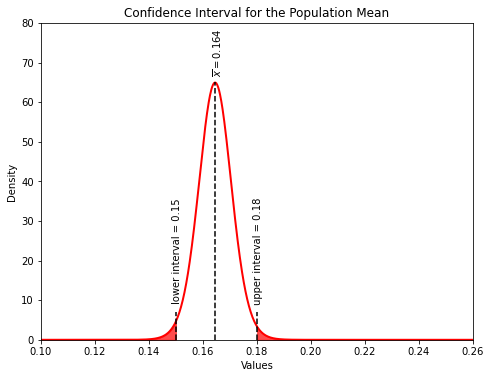

In [9]:
xval = np.linspace(0.1,0.26,1000)
tpdf = stats.t.pdf(xval,loc=smean,df=dof,scale=SE)
plt.plot(xval,tpdf,color='red',lw=2); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Confidence Interval for the Population Mean')
plt.xlim([0.1,0.26]); plt.ylim([0,80])

plt.annotate('lower interval = ' + str(lower_CI),[lower_CI-0.0015,stats.t.pdf(lower_CI,df = dof, loc = smean, scale = sstdev/np.sqrt(n))+5],rotation=90.0)
plt.annotate('upper interval = ' + str(upper_CI),[upper_CI-0.0015,stats.t.pdf(upper_CI,df = dof, loc = smean, scale = sstdev/np.sqrt(n))+6],rotation=90.0)
plt.annotate('$\overline{x} = $' + str(np.round(smean,3)),[smean-0.0015,stats.t.pdf(smean,df = dof, loc = smean, scale = sstdev/np.sqrt(n))+2],rotation=90.0)
    
plt.fill_between(xval,tpdf,where= xval < lower_CI, color='red',alpha=0.7)
plt.fill_between(xval,tpdf,where= xval > upper_CI, color='red',alpha=0.7)
plt.vlines(smean,0,65,color='black',ls='--')
plt.vlines(lower_CI,0,7,color='black',ls='--'); plt.vlines(upper_CI,0,7,color='black',ls='--')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.3, hspace=0.4); plt.show()

#### Confidence Interval for the Proportion

Now I demonstrate the calculation of the confidence interval for a proportion.

\begin{equation}
\hat{p} \pm t_{\frac{\alpha}{2},n-1} \times \frac {\hat{p}(1-\hat{p})}{\sqrt{n}} 
\end{equation}

First we need to make a new categorical feature to demonstrate confidence intervals for proportions.

* we will assign samples as category 'high porosity' when their porosity is greater than 18%

In [10]:
CX1 = np.where(X1 < 0.18,0,1)
prop_CX1 = np.sum(CX1 == 1)/CX1.shape[0]
print('New binary feature, 1 = high porosity, 0 = low porosity')
print(CX1)

print('\nProportion of high porosity rock in well X1 is ' + str(np.round(prop_CX1,2)))

New binary feature, 1 = high porosity, 0 = low porosity
[1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0]

Proportion of high porosity rock in well X1 is 0.35


Now we are ready to calculate the confidence interval in the proportion with the SciPy stats t interval function.

In [11]:
SE_prop = (prop_CX1*(1-prop_CX1))/math.sqrt(CX1.shape[0])
ci_prop_95_x1 = stats.t.interval(0.95, CX1.shape[0]-1, loc=prop_CX1, scale=SE_prop)
print('The confidence interval for the X1 proportion of high porosity is ' + str(np.round(ci_prop_95_x1,3)))

The confidence interval for the X1 proportion of high porosity is [0.244 0.456]


#### Confidence Interval for the Proportion By-Hand

Let's repeat this calculation by-hand without the SciPy stats function to test our knowledge.

In [12]:
sample_prop = np.sum(CX1 == 1)/CX1.shape[0]
tscore = stats.t.ppf([0.025,0.975], df = len(df)-1)
SE_prop = (prop_CX1*(1-prop_CX1))/math.sqrt(CX1.shape[0])
ci_prop_BH_95_x1 = sample_prop + tscore * SE_prop
print('Statistic +/- t-score x Standard Error')
print('   ' + str(np.round(sample_prop,3)) + '   +/-   ' + str(np.round(tscore[1],2)) + '  x     ' + str(np.round(SE_prop,4)))
print('The confidence interval for the X1 proportion of high porosity is ' + str(np.round(ci_prop_BH_95_x1,3)))

Statistic +/- t-score x Standard Error
   0.35   +/-   2.09  x     0.0509
The confidence interval for the X1 proportion of high porosity is [0.244 0.456]


One can check the Excel file linked above with the confidence interval calculated by hand and confirm that this result is correct.

##### Hypothesis Testing

Now, let's try the t test, hypothesis test for difference in means. This test assumes that the variances are similar along with the data being Gaussian distributed (see the course notes for more on this).  This is our test:

\begin{equation}
H_0: \mu_{X1} = \mu_{X2}
\end{equation}

\begin{equation}
H_1: \mu_{X1} \ne \mu_{X2}
\end{equation}

For the resulting t-statistic and p-value we run this command.

##### Pooled Variance t-test Difference in Means

In [13]:
t_pooled, p_pooled = stats.ttest_ind(X1,X2) # assuminng equal variance
print('The t statistic is ' + str(np.round(t_pooled,2)) + ' and the p-value is ' + str(np.round(p_pooled,5)))

The t statistic is -2.98 and the p-value is 0.00499


The p-value, $p$, is the symmetric interval probaiblity our outside.  In other words the $p$ reported is 2 x cumulative probability of the t statistic applied to the sampling t distribution.  Another way to look at it, if one used the $\pm t_{t_{statistic},.d.f}$ statistic as thresholds, $p$ is the probability being outside this symmetric interval. So we will reject the null hypothesis if $p \lt \alpha$.  From the p-value alone it is clear that we would reject the null hypothesis and accept the alternative hypothesis that the means are not equal.  

In case you want to compare the t-statistic to t-critical, we can apply the inverse of the student's t distribution at $\frac{\alpha}{2}$ and $1-\frac{\alpha}{2}$ to get the upper and lower critcal values.       

In [14]:
n1 = len(X1); n2 = len(X2)
smean1 = np.mean(X1); smean2 = np.mean(X2)
sstdev1 = np.std(X1); sstdev2 = np.std(X2,)
dof = len(X1)+len(X2)-2
t_critical = np.round(stats.t.ppf([0.025,0.975], df=dof),2)
print('The t critical lower and upper values are ' + str(np.round(t_critical,2)))

The t critical lower and upper values are [-2.02  2.02]


We can observe that, as expected, the t-statistic is outside the t-critical interval.  These results are exactly what we got when we worked out the problem by hand in Excel, but so much more efficient!

Now, let's plot this result.

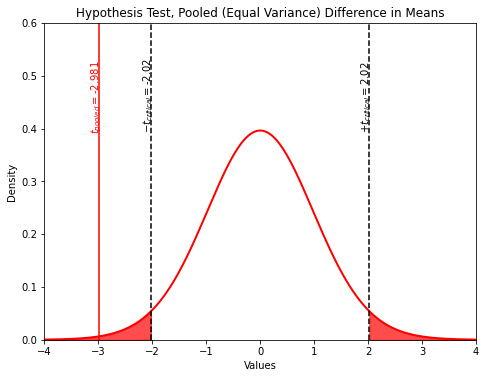

In [15]:
xval = np.linspace(-4.0,4.0,1000)
tpdf = stats.t.pdf(xval,loc=0,df=dof,scale=1.0)
plt.plot(xval,tpdf,color='red',lw=2); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Hypothesis Test, Pooled (Equal Variance) Difference in Means')
plt.xlim([-4.0,4.0]); plt.ylim([0,0.6])

plt.annotate('$-t_{critical} = $' + str(t_critical[0]),[t_critical[0]-0.18,0.4],rotation=90.0)
plt.annotate('$+t_{critical} = $' + str(t_critical[1]),[t_critical[1]-0.18,0.4],rotation=90.0)
plt.annotate('$t_{pooled} = $' + str(np.round(t_pooled,3)),[t_pooled-0.18,0.4],rotation=90.0,color='red')
    
plt.fill_between(xval,tpdf,where= xval < t_critical[0], color='red',alpha=0.7)
plt.fill_between(xval,tpdf,where= xval > t_critical[1], color='red',alpha=0.7)
plt.vlines(t_critical,0,7,color='black',ls='--')
plt.vlines(t_pooled,0,0.7,color='red')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.3, hspace=0.4); plt.show()

##### Welch's t-test Difference in Means 

Now let's try the t-test, hypothesis test for difference in means allowing for unequal variances, this is also known as the Welch's t test.  All we have to do is set the parameter 'equal_var' to false, note it defaults to true (e.g. the command above). 

In [16]:
t_Welch,p_Welch = stats.ttest_ind(X1, X2, equal_var = False) # allowing for difference in variance
print('The t statistic is ' + str(np.round(t_Welch,2)) + ' and the p-value is ' + str(np.round(p_Welch,5)))

The t statistic is -2.98 and the p-value is 0.0055


Once again we can see by $p$ that we will clearly reject the null hypothesis.  

Now let's plot the result!

In [ ]:
xval = np.linspace(-4.0,4.0,1000)
tpdf = stats.t.pdf(xval,loc=0,df=welch_dof(X1,X2),scale=1.0)
plt.plot(xval,tpdf,color='red',lw=2); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Hypothesis Test, Welch\'s (Unequal Variance) Difference in Means')
plt.xlim([-4.0,4.0]); plt.ylim([0,0.6])

plt.annotate('$-t_{critical} = $' + str(t_critical[0]),[t_critical[0]-0.18,0.4],rotation=90.0)
plt.annotate('$+t_{critical} = $' + str(t_critical[1]),[t_critical[1]-0.18,0.4],rotation=90.0)
plt.annotate('$t_{Welch} = $' + str(np.round(t_Welch,3)),[t_Welch-0.18,0.4],rotation=90.0,color='red')
    
plt.fill_between(xval,tpdf,where= xval < t_critical[0], color='red',alpha=0.7)
plt.fill_between(xval,tpdf,where= xval > t_critical[1], color='red',alpha=0.7)
plt.vlines(t_critical,0,7,color='black',ls='--')
plt.vlines(t_pooled,0,0.7,color='red')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.3, hspace=0.4); plt.show()

##### F-test Difference in Variances

Let's now compare the variances with the F-test for difference in variances.  

\begin{equation}
H_0: \frac{\sigma^{2}_{X_2}}{\sigma^{2}_{X_1}} = 1.0
\end{equation}

\begin{equation}
H_1: \frac{\sigma^{2}_{X_2}}{\sigma^{2}_{X_1}} > 1.0
\end{equation}

Note, by ordering the variances we eliminate the case of $\sigma^{2}_{X_2} \lt \sigma^{2}_{X_1}$.

Details about the test are available in the course notes (along with assumptions such as Gaussian distributed) and this example is also worked out by hand in the linked Excel workbook.  We can accomplish the F-test in with SciPy.Stats the function with one line of code if we calculate the ratio of the sample variances ensuring that the larger variance is in the numerator and get the degrees of freedom using the len() command, ensuring that we are consistent with the numerator degrees of freedom set as 'dfn' and the denominator degrees of freedom set as 'dfd'.  We take a p-value of $1-p$ since the test is configured to be a single, right tailed test.    

In [ ]:
p_value = 1 - stats.f.cdf(np.var(X2)/np.var(X1), dfn=len(X2)-1, dfd=len(X1)-1)
p_value

Once again we would clearly reject the null hypothesis since $p \lt alpha$ and assume that the variances are not equal.

#### Compact Code Solution - Hypothesis Test, Student's t-test for Difference in Means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorositySample2Units.csv')
X1 = df['X1'].values; X2 = df['X2'].values

alpha = 0.05
t_critical = stats.t.ppf(alpha/2,len(X1)+len(X2)-2)

t_pooled, p_pooled = stats.ttest_ind(X1,X2) # assuminng equal variance
if(t_pooled < t_critical or t_pooled > -1*t_critical):
    print('Equal Variance: t-critical and t-statistic are ' + str(np.round(t_critical,2)) + ' ≤ ' + str(np.round(t_pooled,2)) + 
      ' ≤ ' + str(np.round(-1*t_critical,2)) + '; therefore, reject the null hypothesis')
else:
    print('Equal Variance: t-critical and t-statistic are ' + str(np.round(t_critical,2)) + ' ≤ ' + str(np.round(t_pooled,2)) + 
      ' ≤ ' + str(np.round(-1*t_critical,2)) + '; therefore, fail to reject the null hypothesis')
    
    alpha = 0.05
t_critical = stats.t.ppf(alpha/2,len(X1)+len(X2)-2)

t_welch, p_welch = stats.ttest_ind(X1,X2,equal_var = False) # assuming unequal variance, Welch's t-test
if(t_welch < t_critical or welch > -1*t_critical):
    print('Welch\'s test: t-critical and t-statistic are ' + str(np.round(t_critical,2)) + ' ≤ ' + str(np.round(t_welch,2)) + 
      ' ≤ ' + str(np.round(-1*t_critical,2)) + '; therefore, reject the null hypothesis')
else:
    print('Welch\'s test: t-critical and t-statistic are ' + str(np.round(t_critical,2)) + ' ≤ ' + str(np.round(t_welch,2)) + 
      ' ≤ ' + str(np.round(-1*t_critical,2)) + '; therefore, fail to reject the null hypothesis')

#### Compact Code Solution - Hypothesis Test, F-test for Difference in Variances

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorositySample2Units.csv')
X1 = df['X1'].values; X2 = df['X2'].values

alpha = 0.05

var_X1 = np.var(X1,ddof=1); var_X2 = np.var(X2,ddof=1) # sample variance
f_stat = np.max([var_X1,var_X2])/np.min([var_X1,var_X2])
if var_X1 > var_X2:
    f_critical = stats.f.ppf(1-alpha,len(X1)-1,len(X2)-1) 
else:
    f_critical = stats.f.ppf(1-alpha,len(X2)-1,len(X1)-1) 
if f_stat > f_critical:
    print('f-statistic and f-critical are ' + str(np.round(f_stat,2)) + ' > ' + str(np.round(f_critical,2)) 
          + '; therefore, reject the null hypothesis')
else:
    print('f-statistic and f-critical are ' + str(np.round(f_stat,2)) + ' ≤ ' + str(np.round(f_critical,2)) 
          + '; therefore, fail to reject the null hypothesis')

f-statistic and f-critical are 2.67 > 2.17; therefore, reject the null hypothesis


#### Comments

We are just scratching the surface for confidence intervals and hypothesis tests.  Once again there are a lot of details left out of the problem formulation and assumptions, see the course notes for more coverage.  By running the same confidence interval and hypothesis tests 1) by hand in Excel and with 2) R and 3) Python code, I hope this demonstration will enable and encourage more engineers and scientists to make these R and Python tools part of their common practice. I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.
